<a href="https://colab.research.google.com/github/lambdany/Tink_ML_sping23/blob/main/fifaeda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

import matplotlib.pyplot as plt # visualization
import seaborn as sns

import plotly.express as px

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np # linear algebra
import pandas as pd # data processing

# Домашнаяя работа: работа с numpy, pandas и matplotlib

В этой домашней работе вам предстоит выполнить EDA (Exploratory Data Analysis) датасета с данными о футболистах FIFA.

Требования к выполнению домашней работы:
- Во всех графиках должны быть подписи через `title`, `legend`, etc.
- Убедитесь, что после сохранения ноутбука графики всё ещё видно, если открыть ноутбук заново. Если не видно - напишите в общий чатик, вам помогут либо преподаватели, либо те, кто уже столкнулся с этой проблемой
- Можно баловаться с цветами, но в меру. Если в итоге работа станет нечитаемой, то задание не будет засчитано
- Если вы сдаете работу в Google Colaboratory, убедитесь, что ваша тетрадка доступна по ссылке. Если в итоге по каким-то причинам тетрадка не будет открываться у преподавателя, задание не будет засчитано

In [2]:
df = pd.read_csv('data.csv')

In [ ]:
df.info();

In [4]:
df.columns;
df['International Reputation'].head(2);

In [5]:
df[['Wage']].head(3);
df['Skill Moves'].unique();

# Работа с датафреймом

Заполните пропуски:

1. В датасете `88` переменных 
2. Из них числовых `43`

# Работа с графикой

3. Изучите распределение возрастов с помощью колонки Age [px.histogram](https://plotly.com/python/histograms/)
4. Изучите [более продвинутые методы](https://plotly.com/python/distplot/) визуализации распределений 

In [12]:
fig = px.histogram(df, 
                   x="Age", 
                   marginal="violin",
                   text_auto=True,
                   title='Age distribution')
fig.show(renderer="colab")

5. Найдите колонку, показывающую, является ли футболист левой или правшой

**'Preferred Foot'**

6. Визуализируйте соотношенеие между левшами и правшами (считаем, что признак "левша"/"правша" определяет предпочтительную ногу для ударов

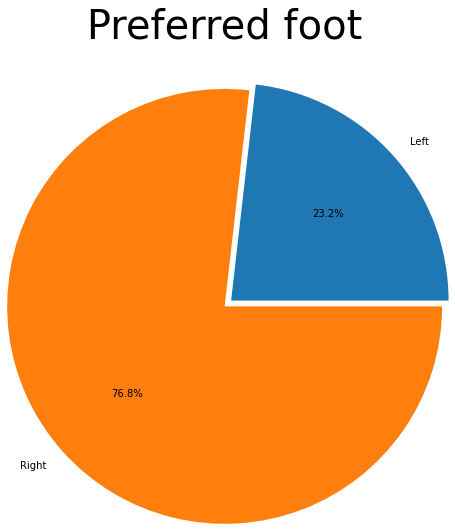

In [14]:
fig, ax = plt.subplots();
ax.pie ([len(df.loc[df['Preferred Foot'] == 'Left']), len(df.loc[df['Preferred Foot'] == 'Right'])], 
         labels=['Left', 'Right'],
         explode=[0.1, 0],
         radius=2.5,
         autopct='%1.1f%%');
ax.set_title('Preferred foot',
             pad = 160,
             fontsize = 40)
plt.show()

7. Визуализируйте Международный Рейтинг футболистов (International Reputation)
8. Ассоциирован ли он с национальностью? С футбольным клубом? 

**Ответ: Зависимость не прослеживается.**

![Игроки](Players.png "Title")

In [16]:
df['International Reputation'].sample(30)
ind_NaN = df['International Reputation'].loc[df['International Reputation'].isna()].index.values # индексы тех у кого NaN
df_new = df.drop(index=ind_NaN) # новый датафрейм где нет футболистов с NaN


df_new = df_new.astype({'International Reputation': np.int}) # рейтинг в int

df_new = df_new.sort_values(by = 'International Reputation')

fig = px.scatter(df_new, 
                 x = 'Club',
                 y = 'Nationality', 
                 hover_name = 'Name',
                 color = 'International Reputation',
                 title = 'IR from 1 to 5')

fig.show(renderer="colab")

fig = px.scatter(df_new[df_new['International Reputation'] > 1], 
                 x = 'Club',
                 y = 'Nationality', 
                 hover_name = 'Name',
                 color = 'International Reputation',
                 #size = 'International Reputation',
                 title = 'IR from 2 to 5')

fig.show(renderer="colab")

fig = px.scatter(df_new[df_new['International Reputation'] > 2], 
                 x = 'Club',
                 y = 'Nationality', 
                 hover_name = 'Name',
                 color = 'International Reputation',
                 #size = 'International Reputation',
                 title = 'IR from 3 to 5')

fig.show(renderer="colab")

fig = px.scatter(df_new[df_new['International Reputation'] > 3], 
                 x = 'Club',
                 y = 'Nationality', 
                 hover_name = 'Name',
                 color = 'International Reputation',
                 #size = 'International Reputation',
                 title = 'IR 4 and 5')

fig.show(renderer="colab")

fig = px.scatter(df_new[df_new['International Reputation'] ==5 ], 
                 x = 'Club',
                 y = 'Nationality', 
                 hover_name = 'Name',
                 color = 'International Reputation',
                 #size = 'International Reputation',
                 title = 'IR = 5')

fig.show(renderer="colab")

<ipython-input-16-fd4a0355e184>:6: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



9. Есть ли зависимость между потенциалом (Potential) и Международным Рейтингом футболистов (International Reputation)? Визуализируте её
10. Влияет ли на потенциал игровая нога? Почему так может случиться? (картинка в тему)

 **Ответ: И для левой, и для правой ноги зависимость IR~P может быть приближена линейной зависимостью IR = 0.024 * P +- 0.6 , говорить о влиянии ноги не приходится**

![Коазуация или корреляция?](causuation.png "???")

In [17]:

fig = px.scatter(df_new, 
                 x ='Potential', 
                 y = 'International Reputation',
                 hover_name='Name',
                 color = "Preferred Foot",
                 facet_row= "Preferred Foot",
                 trendline="ols",
                 marginal_y = 'histogram',
                 title = 'International Reputation ~ Potential'
                 )
fig.show(renderer="colab")

Теперь пройдёмся по показателям игроков...

11. Есть ли зависимость между **выносливостью** игрока (Stamina) и его **силой** (Strength)? Какая? Точно ли это зависимость? 
**Ответ: изучив график, в целом можно говорить о совместном распределении этих величин как о двумерном нормальном, то есть они ведут себя независимо и нормально**

In [18]:
'''
fig = px.density_contour(df, 
                 x ='Stamina', 
                 y = 'Strength')
                 '''
fig = px.density_heatmap(df, 
                 x ='Stamina', 
                 y = 'Strength',
                 title = 'Stamina ~ Strength',
                 marginal_x="histogram", 
                 marginal_y="histogram")
fig.show(renderer="colab")

12. Зависит ли **стоимость** игрока (Value) от его "**финтов**" (Skill Moves)?

**Ответ: средняя стоимость игрока мало отличается при Skill Moves = {1,2,3} (интересно, что при значении скилла 2 даже ниже, чем для 3), но сильно возрастает при 4 и еще больше при 5 (см гистограмму)**

In [19]:
df = pd.read_csv('data.csv')

for i in df['Value'].index.values:
  s =  ( str( df.loc[i, 'Value'] ) ).replace('€', '')
  if 'K' in s:
    s = s.replace('K', '')
    s = float(s)
    s = s / 1000
  elif 'M' in s:
    s = s.replace('M', '')
    s = float(s)
  df.loc[i, 'Value'] = s

fig = px.histogram(df,
                   y = 'Value',
                   x = "Skill Moves", 
                   histfunc = 'avg',
                   orientation = 'v',
                   text_auto=True,
                   #nbins = 10,
                   title='Avg of Value (€M) ~ Skill Moves'
                   )
fig.show(renderer="colab")

13. Покажите распределения основных характеристик игроков: **рост**, **вес**, **возраст** по **позициям** (Position), сделайте выводы

**Выводы:**

1.   Вратари самые высокие и самые тяжелые
2.   Крайние атакующие полузащитники самые опытные (возрастные)
3.   Крайние нападающие обычно моложе остальных, как и форвард-созидатель (?) и опорный полузацитник






In [20]:
def F1 (t):
  temp = []
  for j in t:
    temp.append(float(j.replace("'", ".")))
  temp = np.array(temp)
  return temp.mean()

def F2 (t):
  temp = []
  for j in t:
    temp.append(float(j.replace('lbs', '')))
  temp = np.array(temp)
  return temp.mean()


df['Position'].unique()
ind_NaN = df['Position'].loc[df['Position'].isna()].index.values
df_new = df.drop(index=ind_NaN)
pos_set = df_new['Position'].unique()
pos_set = list(pos_set)
h_set = []
w_set = []
a_set = []

for i in pos_set:
  h_set.append( F1( df_new['Height'].loc[df_new['Position'] == i] ) )
  w_set.append( F2( df_new['Weight'].loc[df_new['Position'] == i] ) )
  a_set.append(df_new['Age'].loc[df_new['Position'] == i].mean() )

# нормируем для наглядности
h_set = np.array(h_set)
h_set = h_set / h_set.max()
w_set = np.array(w_set)
w_set = w_set / w_set.max()
a_set = np.array(a_set)
a_set = a_set / a_set.max()

#строим
fig = go.Figure()
fig.add_trace(go.Scatter(x=pos_set, y=h_set, mode='lines+markers', name='Height',
                         marker=dict(color='olive', size=30, line=dict(color='olive', width=3))))
fig.add_trace(go.Scatter(x=pos_set, y=w_set, mode='lines+markers', name='Weight',
                         marker=dict(color='lightskyblue', size=27, line=dict(color='lightskyblue', width=3))))
fig.add_trace(go.Scatter(x=pos_set, y=a_set, mode='lines+markers', name='Age',
                         marker=dict(color='lightpink', size=24, line=dict(color='lightpink', width=3))))
fig.update_layout(legend_orientation="h",
                  title="Распределение основных харктеристик (рост, вес, возраст) по позициям",
                  xaxis_title="Position",
                  yaxis_title="Dimensionless average value",
                  margin=dict(l=0, r=0, t=30, b=0)
                  )
fig.show(renderer="colab")

14. Есть ли зависимость **скорости** (SprintSpeed) от **веса** и **роста**? От **национальности**?

**До определенных значений веса и роста зависимость SprintSpeed от мало этих показателей (близка к константе), но после этих определенных значений веса и роста SprintSpeed стремительно (линейно) убывает.
 По поводу зависимости от национальности: парочка национальностей с очень высокими показателями (выше90) и парочка с очень низкими (ниже 50), но в целом все другие национальности находятся в неком обычном интервале, зависимость не прослеживается**

In [21]:
ind_NaN = df['SprintSpeed'].loc[df['SprintSpeed'].isna()].index.values # индексы тех у кого NaN
df_new = df.drop(index=ind_NaN)

for i in df_new['Weight'].index.values:
  df_new.loc[i, 'Weight'] = int((str(df_new.loc[i, 'Weight'])).replace('lbs', ''))

for i in df_new['Height'].index.values:
  df_new.loc[i, 'Height'] = float((str(df_new.loc[i, 'Height'])).replace("'", '.'))

In [23]:
fig = px.scatter(df_new, 
                 x ='Weight', 
                 y = 'SprintSpeed',
                 hover_name='Name',
                 trendline="lowess",
                 marginal_y = 'histogram',
                 title = 'SprintSpeed ~ Weight(lbs)'
                 )
fig.show(renderer="colab")

fig = px.scatter(df_new, 
                 x ='Height', 
                 y = 'SprintSpeed',
                 hover_name='Name',
                 trendline="lowess",
                 marginal_y = 'histogram',
                 title = 'SprintSpeed ~ Height(foot)'
                 )
fig.show(renderer="colab")

#гистограмма средних значений SprintSpeed по национальностям
fig = px.histogram(df_new,
                   x="Nationality", 
                   y = 'SprintSpeed',
                   histfunc = 'avg',
                   text_auto=True,
                   title='SprintSpeed ~ Nationality'
                   )
fig.show(renderer="colab")

15. Под какими номерами чаще всего играют нападающие? Визуализируйте частотность

**Чаще всего нападающие играют под номером 9 (с большим отрывом). Топ по частоте:**

1.   9
2.   11
3.   19
4. 10
5. 7



In [24]:
striker_positions = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
df_new = df[(df['Position'] == 'LS') |
            (df['Position'] == 'ST') |
            (df['Position'] == 'RS') |
            (df['Position'] == 'LW') |
            (df['Position'] == 'LF') |
            (df['Position'] == 'CF') |
            (df['Position'] == 'RF') |
            (df['Position'] == 'RW') 
            ]

fig = px.histogram(df_new, 
                   x="Jersey Number", 
                   marginal="violin",
                   text_auto=True,
                   nbins = 100,
                   title='Jersey Number distribution'
                   )
fig.show(renderer="colab")

16. Есть ли за зависимость **силы удара** (ShotPower) от **ведущей ноги**? от **агрессивности** (Aggression)? 

**Зависимости от ведущей ноги нет (распределения очень близки). Распределение похоже на нормальное, но плотность "рваная" в некоторых подобластях**

In [25]:
df_new = df[ (df['Preferred Foot'] == 'Left') | (df['Preferred Foot'] == 'Right') ]

df_new = df_new.sort_values(by = 'Age') #пересортировали по другому показателю для наглядности точек на графике
fig = px.scatter(df_new, 
                 x ='Aggression', 
                 y = 'ShotPower',
                 hover_name='Name',
                 color = "Preferred Foot",
                 trendline="ols",
                 marginal_y = 'violin',
                 title = 'ShotPower ~ Aggression'
                 )
fig.show(renderer="colab")

17. Найдите суммарную стоимость игроков в каждом клубе
**Данные записаны в массив *sum***
( *sum[i]* - суммарная стоимость игроков в клубе *clubs[i]*)

18. Визуализируйте соотношение сумарной стоимости топ 10 клубов

In [26]:
clubs = df['Club'].unique()
sum = np.zeros(len(clubs))
inx_c = 0
for c in clubs:
  for i in df[ df['Club']==c ].index.values:
    #print(inx_c , df.loc[i, 'Value'], type(df.loc[i, 'Value']))
    if type(df.loc[i, 'Value']) == str:
      df.loc[i, 'Value'] = float(df.loc[i, 'Value'])
    sum[inx_c] =  sum[inx_c] + df.loc[i, 'Value'] 
  inx_c += 1

inx_top = [np.argsort(sum)[i] for i in range(len(sum)-10, len(sum))]
inx_top = inx_top[::-1]

df_new = df[(df['Club'] == clubs[0]) |
            (df['Club'] == clubs[1]) |
            (df['Club'] == clubs[2]) |
            (df['Club'] == clubs[3]) |
            (df['Club'] == clubs[4]) |
            (df['Club'] == clubs[5]) |
            (df['Club'] == clubs[6]) |
            (df['Club'] == clubs[7]) |
            (df['Club'] == clubs[8]) |
            (df['Club'] == clubs[9])
            ]

fig = px.histogram(df_new,
                   x="Club", 
                   y = 'Value',
                   histfunc = 'sum',
                   text_auto=True,
                   title='Sum Value (M) ~ Club (Top 10 clubs)'
                   )
fig.show(renderer="colab")

19. Есть ли зависимость между продолжительностью контракта игрока и его стоимостью? 

**До 7 возрастает, после 7 в некотором смысле выходит на плато вплоть до 14, а дальше я бы предположила, что для продолжительности контракта свыше 14 лет стоимость устанавливается в каждом кейсе индивидуально, то есть не зависит от продолжительности контракта**

In [27]:
ind_NaN = df['Joined'].loc[df['Joined'].isna()].index.values
df_new = df.drop(index=ind_NaN)
ind_NaN = df_new['Contract Valid Until'].loc[df_new['Contract Valid Until'].isna()].index.values
df_new = df_new.drop(index=ind_NaN)

for i in df_new['Joined'].index.values:
  df_new.loc[i, 'Joined'] = int((df_new.loc[i, 'Joined'])[-4:])
for i in df_new['Contract Valid Until'].index.values:
  df_new.loc[i, 'Contract Valid Until'] = int((df_new.loc[i, 'Contract Valid Until'])[-4:])



In [28]:

df_new['продолжительность контракта'] = df_new['Contract Valid Until'] - df_new['Joined']
df_new['продолжительность контракта'].sample(15)
fig = px.histogram(df_new,
                   x='продолжительность контракта', 
                   y = 'Value',
                   histfunc = 'avg',
                   text_auto=True,
                   title='Продолжительность контракта (кол-во лет) ~ Средняя стоимость игрока (€ M)'
                   )
fig.show(renderer="colab")


20. В какой год будет больше всего свободных игроков на рынке (исходя из этих данных)? Визуализируйте зависимость

**В 2019 года освободится больше всего игроков**

In [29]:
fig = px.histogram(df_new,
                   x='Contract Valid Until',
                   histfunc = 'count',
                   text_auto=True,
                   title='Количество освобождающихся игроков по годам'
                   )
fig.show(renderer="colab")


21. Есть ли зависмость **потенциала** (Potential) игрока от **возраста**?
**Распределение выглядит как совместное распределение двух независимых нормальных случайных величин**

22. Всегда ли молодые игроки обладают большим потенциалом?
**Молодыми будем считать тех, у кого возраст меньше (среднее - ср/кв отклонение). Судя по графику - очевидно не всегда.**

In [30]:
# посчитаем среднее и среднеквадратичное отклонение возраста
avarage_age = df['Age'].mean()
sigma = np.sqrt( df['Age'].var() )

# молодыми будем считать тех, у кого возраст меньше (среднее - ср/кв отклонение) 
df_new = df
df_new.loc[df['Age'] < (avarage_age-sigma), 'young'] = 'young'
df_new.loc[df['Age'] >= (avarage_age-sigma), 'young'] = 'old'

fig = px.scatter(df_new, 
                 x ='Age', 
                 y = 'Potential',
                 hover_name='Name',
                 color = "young",
                 trendline="ols",
                 trendline_scope = "overall",
                 marginal_y = 'violin',
                 title = 'Potential ~ Age'
                 )
fig.show(renderer="colab")

23. Есть ли зависимость **рейтинга** игрока (Overall) от **возраста**?
**Совместное распределение похоже на нормальное**

24. Когда у игроков "пик" карьеры?

**Судя по графику, где-то к 30 (и позже)**

25. Игроков какого возраста больше всего с рейтингом 90+?
**Ответ: 32**

In [31]:

df['Overall'].sample(10)
#rendline (str) – One of 'ols', 'lowess', 'rolling', 'expanding' or 'ewm'


fig = px.scatter(df, 
                 x ='Age', 
                 y = 'Overall',
                 hover_name='Name',
                 trendline="lowess",
                 #marginal_x = 'violin',
                 marginal_y = 'violin',
                 title = 'Overall ~ Age'
                 )
fig.show()

df_new = df[ df['Overall'] >= 90 ]

fig = px.histogram(df_new, 
                   x="Age", 
                   marginal="violin",
                   text_auto=True,
                   nbins = len(df_new),
                   title='Age distribution (overall 90+)'
                   )
fig.show(renderer="colab")

26. Насколько средняя зарплата (Wage) игроков с рейтингом (Overall) 90+ больше средней зарплаты с рейтингом [80 - 90]? Визуализируйте возможную зависимость

**У игроков с рейтингом 90+ средняя зарплата в 4 раза выше, чем у игроков с рейтингом [80-90]**

In [32]:
df = pd.read_csv('data.csv')

for i in df['Wage'].index.values:
  s =  ( str( df.loc[i, 'Wage'] ) ).replace('€', '')
  if 'K' in s:
    s = s.replace('K', '')
    s = float(s)
  elif 'M' in s:
    s = s.replace('M', '')
    s = float(s)
    s = s * 1000
  df.loc[i, 'Wage'] = int(s)


In [33]:
df_new = df[ df['Overall'] >= 80 ]

fig = px.histogram(df_new,
                   x = 'Overall',
                   y = 'Wage',
                   histfunc = 'avg',
                   orientation='v',
                   nbins = 2,
                   title = 'Avg of Wage (€K) ~ Overall (top Overall)')
fig.show(renderer="colab")